In [1]:
import json

In [2]:
import csv

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
from sklearn import svm

In [9]:
from sklearn import metrics

In [10]:
import pickle

In [11]:
from sklearn import naive_bayes

In [12]:
from IPython.display import Image

In [13]:
from sklearn.model_selection import StratifiedKFold

In [14]:
from sklearn import ensemble

In [15]:
from sklearn import tree

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
import scikitplot as skplt

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.metrics import f1_score

In [21]:
vocab_file='../data/dataset.csv'

In [22]:
label_file='../data/label1.csv'

In [23]:
df= pd.read_csv(vocab_file)

In [24]:
df2=pd.read_csv(label_file)

In [25]:
print(df.shape)
print(df2.shape)

(3033, 10990)
(3033, 1)


In [26]:
print(df.values)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.00000000e+00
  4.84022556e-01 8.17000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.60000000e-01 8.03000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.90753880e-01 8.20000000e+02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.00000000e-01 8.15000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.00000000e+00
  3.75587094e-01 8.12000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  3.50455182e-01 8.14000000e+02]]


In [27]:
df2

,news-label
0,spam
1,spam
2,spam
3,spam
4,spam
5,spam
6,spam
7,spam
8,spam
9,spam


In [28]:
label_dict={'not spam': 1, 'spam': 0}
df2['news-label']= df2['news-label'].map(label_dict)
y=df2['news-label']
print(y)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3003    1
3004    1
3005    1
3006    1
3007    1
3008    1
3009    1
3010    1
3011    1
3012    1
3013    1
3014    1
3015    1
3016    1
3017    1
3018    1
3019    1
3020    1
3021    1
3022    1
3023    1
3024    1
3025    1
3026    1
3027    1
3028    1
3029    1
3030    1
3031    1
3032    1
Name: news-label, Length: 3033, dtype: int64


In [29]:
x= df
print(x)

      """weird al"" yankovic"  "austin, texas"  "bergen county, new jersey"  \
0                           0                0                            0   
1                           0                0                            0   
2                           0                0                            0   
3                           0                0                            0   
4                           0                0                            0   
5                           0                0                            0   
6                           0                0                            0   
7                           0                0                            0   
8                           0                0                            0   
9                           0                0                            0   
10                          0                0                            0   
11                          0                0      

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Support Vector Machine
Accuracy score is :           83.64730716763692
Micro precision score is:           83.64730716763692
Macro precision score is:           86.36773251415016
Weighted precision score is:        84.91338998066202
Recall score is:              96.91833102630018
F1 score is:              83.64730716763692


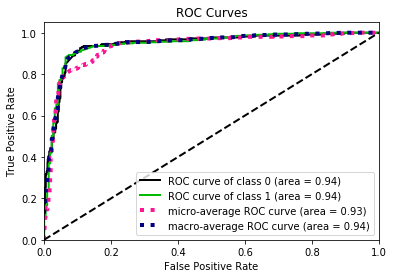

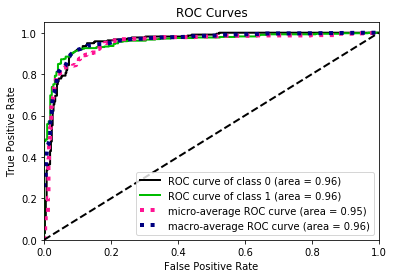

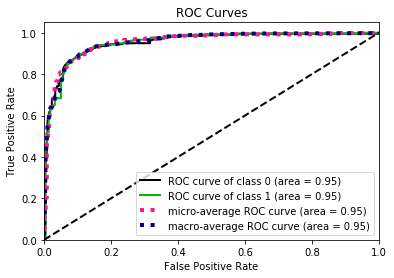

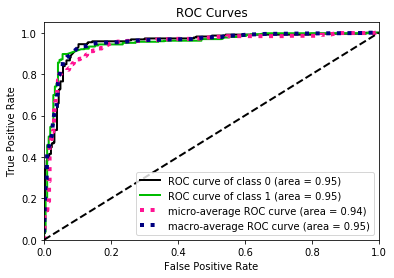

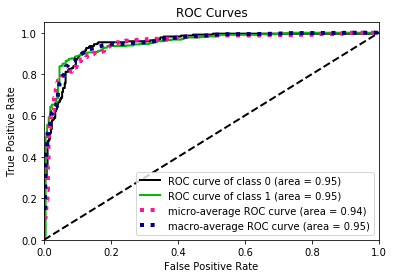

In [30]:
#df=pd.DataFrame(B) 
accuracy_sum=0

precision_micro_sum=0
precision_macro_sum=0
precision_weighted_sum=0

recall_sum=0
f1_sum=0

clf= svm.SVC(C=0.5,gamma=0.1,probability=True)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    #precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    
    recall= metrics.recall_score(y_test, y_pred)
    
    precision_micro=metrics.precision_score(y_test,y_pred, average='micro')
    precision_micro_sum=precision_micro_sum+precision_micro
    precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    precision_macro_sum=precision_macro_sum+precision_macro
    precision_weighted=metrics.precision_score(y_test,y_pred, average='weighted')
    precision_weighted_sum=precision_weighted_sum+precision_weighted
    
    recall_sum= recall_sum+recall
    
    accuracy_sum=accuracy_sum+accuracy
    f1=f1_score(y_test, y_pred, average='micro')
    f1_sum=f1_sum+f1
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)
    
    
    

accuracy_average= accuracy_sum/5
precision_micro_average=precision_micro_sum/5
precision_macro_average=precision_macro_sum/5
precision_weighted_average=precision_weighted_sum/5

recall_average=recall_sum/5
f1_avg=f1_sum/5

print('Support Vector Machine')
print('Accuracy score is :          ',accuracy_average*100)

print('Micro precision score is:          ',precision_micro_average*100)
print('Macro precision score is:          ',precision_macro_average*100)
print('Weighted precision score is:       ',precision_weighted_average*100)

print('Recall score is:             ',recall_average*100)
print('F1 score is:             ',f1_avg*100)

#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Multinomial Naive Bayes Classifier
Accuracy score is :           66.1081817450799
precision score is:           66.1840608194134
Recall score is:              96.81418495814383
66.1081817450799


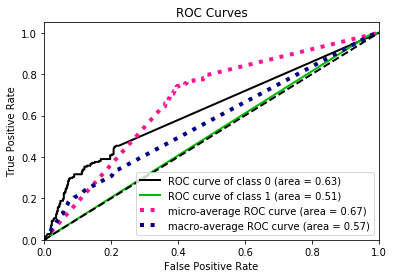

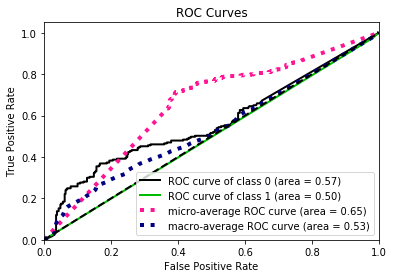

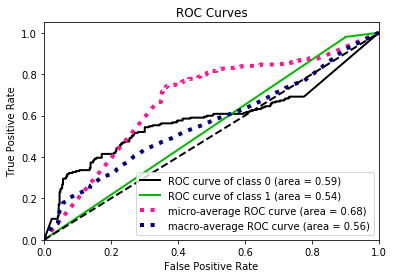

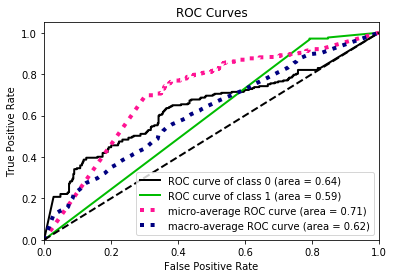

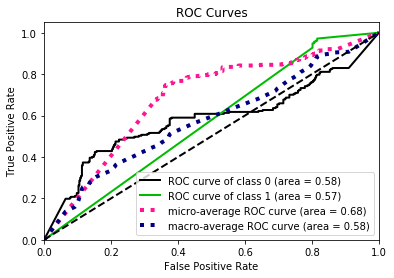

In [82]:
df=x
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= MultinomialNB()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Multinomial Naive Bayes Classifier')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


C:\Users\Zoya Ch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Regression: 
Accuracy score is :           66.86676795443353
precision score is:           68.27717002561573
Recall score is:              91.26689077845892
66.86676795443353


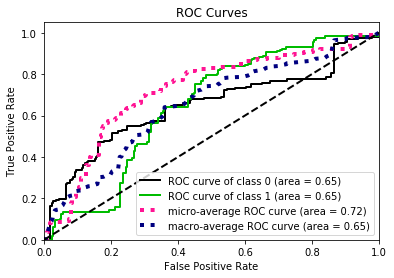

In [83]:
accuracy_sum=0

precision_sum=0
recall_sum=0
pred_sum=[]
clf= LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    y_pred= clf.predict_proba(x_test)
    
    
    #skplt.metrics.plot_roc(y_test, y_pred)
    
y_pred= clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred)    

accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Logistic Regression: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Gradient Boosting Classifier: 
Accuracy score is :           93.17684237425738
precision score is:           93.66426849881798
Recall score is:              95.99419945949508
93.17684237425738


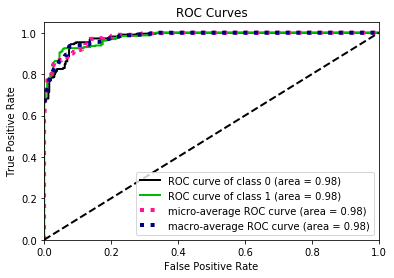

In [84]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= ensemble.GradientBoostingClassifier()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
y_pred= clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred)
print('Gradient Boosting Classifier: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

In [85]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Random Forest Classifier: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Random Forest Classifier: 
Accuracy score is :           64.19388122589247
precision score is:           64.19388122589247
Recall score is:              100.0
64.19388122589247


In [86]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= DecisionTreeClassifier(random_state=0)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Decision Tree Classifier: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Decision Tree Classifier: 
Accuracy score is :           94.16623527435549
precision score is:           95.30302771716738
Recall score is:              95.78722562784259
94.16623527435549


In [34]:
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    nb.fit(x_train, y_train)
    y_pred=nb.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    
    
    
    

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


NameError: name 'nb' is not defined

In [35]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= MultinomialNB()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Multinomial Naive Bayes Classifier')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Multinomial Naive Bayes Classifier
Accuracy score is :           50.63095238095238
precision score is:           81.81818181818181
Recall score is:              75.0
50.63095238095238
